In [1]:
# IMPORTS :

import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
from tensorflow.python.keras import optimizers as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Data :

df = pd.read_csv('Days.csv')
df["Date"] = pd.to_datetime(df['timestamp'])
df.set_index(['Date'],inplace=True)

df = pd.DataFrame(df, columns=['Y'])

df

,Y
Date,
2007-01-01,1.908564
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2009-12-27,1.524619
2009-12-28,1.454235
2009-12-29,1.422200


In [17]:
# Prepare Data :



shifted_df = df.shift()

concat_df = [df,shifted_df]

data = pd.concat(concat_df,axis = 1)
data.fillna(0, inplace = True)



data = np.array(data)

train, test = data[0:-500], data[-500:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)



# train data 
y_train = train_scaled[:,-1] 
X_train = train_scaled[:,0:-1] 
X_train = X_train.reshape(len(X_train),1,1)
# données de test 
y_test = test_scaled[:,-1] 
X_test = test_scaled[:,0:-1]

In [4]:
# Model :

model = Sequential()
model.add(GRU(75, input_shape=(1,1)))
model.add(Dense(2))  
opt = keras.optimizers.Adam(learning_rate=0.01) #learning_rate=0.001
model.compile(loss='mean_squared_error', optimizer= opt, metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=20, shuffle=False)

Epoch 1/100
30/30 [==============================] - 2s 2ms/step - loss: 0.0541 - accuracy: 0.0034
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.0034
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.0017
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.0017
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.0034
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0034
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0000e+00
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0017
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0017
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0017
Epoch

30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 83/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 84/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 85/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0050
Epoch 86/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 87/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0050
Epoch 88/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 89/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0050
Epoch 90/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 91/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.0017
Epoch 92/100


In [5]:
X_test = X_test.reshape(500,1,1)
y_pred = model.predict(X_test)

In [46]:
predictions_trad = scaler.inverse_transform(y_pred)

predictions_col = []

for i in predictions_trad :
    predictions_col.append(i[0])
    


ol = pd.DataFrame(predictions_col)

ol['Date'] = df.index[-500:]

ol.set_index(['Date'],inplace=True)

df['Y_pred'] = ol

df


,Y,Y_pred
Date,,
2007-01-01,1.908564,NaN
2007-01-02,0.881414,NaN
2007-01-03,0.704204,NaN
2007-01-04,2.263481,NaN
2007-01-05,1.884281,NaN
...,...,...
2009-12-27,1.524619,1.412252
2009-12-28,1.454235,1.380714
2009-12-29,1.422200,1.365637


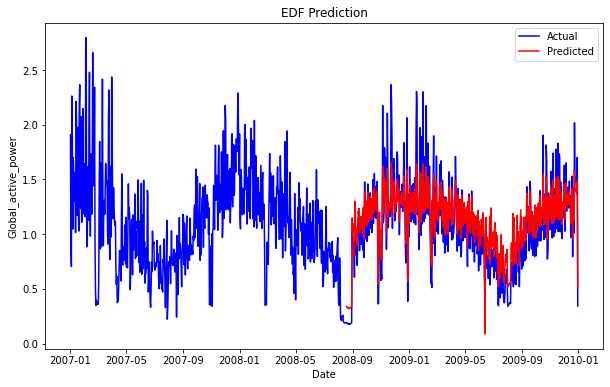

In [47]:
# Affichage :

plt.figure(figsize=(10,6))
plt.plot(df['Y'], color='blue', label='Actual')
plt.plot(df['Y_pred'] , color='red', label='Predicted')
plt.title('EDF Prediction')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

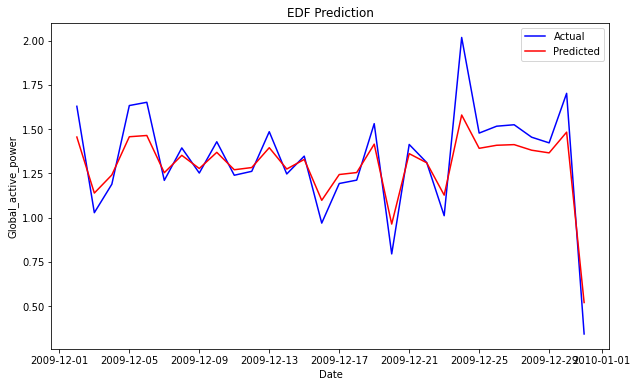

In [48]:
# Affichage 2 :

plt.figure(figsize=(10,6))
plt.plot(df['Y'][-30:], color='blue', label='Actual')
plt.plot(df['Y_pred'][-30:] , color='red', label='Predicted')
plt.title('EDF Prediction')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()